<a href="https://colab.research.google.com/github/ElisaCSouza23/projetos/blob/main/Desafio_modulo_01_Bootcamp_Analista_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enunciado da questão**


Você é um cientista de dados em uma equipe de saúde que está buscando
identificar padrões em dados médicos de pacientes. 

Sua equipe está trabalhando em um projeto para identificar riscos de saúde em pacientes com problemas de saúde específicos, como diabetes, hipertensão ou doença cardiovascular. 

**Seu objetivo é coletar, tratar e analisar dados de pacientes
para criar grupos de pacientes com risco intermediário, alto ou muito alto de
problemas de saúde.**

Sua equipe decidiu usar o método de **agrupamento k-means para agrupar os
pacientes em três grupos distintos com base nas informações fornecidas**. O
objetivo é identificar padrões nos dados que possam indicar o risco de um paciente desenvolver problemas cardiovasculares. 

As doenças cardiovasculares são uma das principais causas de morbidade e mortalidade em todo o mundo. É essencial que os profissionais de saúde possam
identificar pacientes com maior risco de desenvolver essas doenças, a fim de
oferecer tratamentos e aconselhamentos preventivos personalizados.


# Importando bibliotecas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

# Verificando versões das bibliotecas

In [6]:
# import sklearn
# import plotly
# print(f'''Verificando versões das bibliotecas: \n
# pandas: {pd._version_}
# sklearn: {sklearn._version_}
# plotly: {plotly._version_}
# ''') 

# Coleta de dados

In [8]:
# Coleta de dados 1
dados_medicos = pd.read_csv('/content/dados_medicos.csv', sep=';', encoding='latin-1')
dados_medicos.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [9]:
# Coleta de dados 2
dados_perfil = pd.read_excel('/content/dados_perfil.xlsx')
dados_perfil.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [12]:
# Coleta de dados 3
uf = pd.read_csv('/content/unidades_federativas_do_Brasil.csv', sep=';', encoding='latin-1')
uf.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


# Analisando os dados

In [13]:
# info da base de dados médicos
dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [14]:
# info da base de dados perfil
dados_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [15]:
# info da base de dados Unidades Federativas do Brasil
uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


# Analisando dados ausentes

In [16]:
# Analisando dados médicos
dados_medicos.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

Há dados nulos na coluna "Colesterol total".





In [20]:
# Analisando dados perfil
dados_perfil.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

Há dados nulos na coluna "Idade".


In [21]:
# Analisando dados Unidades Federativas do Brasil
uf.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

Não há dados nulos.

# Visualizando dados ausentes

In [23]:
# Verificando os registros com valores nulos (dados médicos)
dados_medicos.loc[dados_medicos['Colesterol Total'].isnull()]

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
42,43,26.7,165,66,Normal,177.2,NaN,141.9,Não
48,49,24.4,141,68,Normal,113.8,NaN,175.8,Sim
218,219,33.5,142,69,Normal,150.9,NaN,168.3,Não
401,402,31.0,142,90,Alto,104.4,NaN,120.0,Não
565,566,20.6,155,87,Normal,129.9,NaN,155.6,Sim
629,630,28.7,92,86,Normal,143.6,NaN,110.7,Não
710,711,33.6,92,100,Alto,171.9,NaN,119.1,Não
720,721,27.4,112,88,Normal,143.0,NaN,148.1,Não
737,738,33.2,140,61,Normal,133.8,NaN,86.0,Não
839,840,36.1,116,83,Normal,134.2,NaN,160.4,Não


In [24]:
# Verificando os registros com valores nulos (dados perfil)
dados_perfil.loc[dados_perfil['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


# Tratamento de dados **numéricos** coletados

## Eliminação de dados

In [27]:
# Eliminando dados ausentes de dados perfil (Idade, não faz sentido algum fazer a média entre as idades, por isso, 
# iremos excluir os registros nulos)
dados_perfil.dropna(subset=['Idade'], inplace=True)
dados_perfil

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41
...,...,...,...,...,...,...
994,995,F,18.0,Alto,Sedentário,31
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51


In [28]:
dados_perfil.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

De fato, removemos os valores nulos do dataframe.

In [29]:
dados_perfil.count()

ID                   990
Gênero               990
Idade                990
Consumo de Álcool    990
Atividade Física     990
cod_uf               990
dtype: int64

## Corrigindo dados ausentes por outras medidas (média/mediana)

In [31]:
# Visualizando estatísticas do dataset de dados médicos
dados_medicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [36]:
# Realizando a média e a mediana da variável 'Colesterol Total'
media = dados_medicos['Colesterol Total'].mean()
mediana = dados_medicos['Colesterol Total'].median()

In [37]:
# Verificando os valores
print(f'O valor da média é: {media}, e o valor da mediana é: {mediana}')

O valor da média é: 193.21971688574317, e o valor da mediana é: 194.3


In [38]:
# Fazendo o arredondamento da variável média
round(media,2)

193.22

In [39]:
# Preenchendo os valores ausentes pela média
dados_medicos['Colesterol Total'].fillna(round(media,2), inplace=True)

In [40]:
# Verificando se existe algum valor ausente
dados_medicos.isna().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

Não há registros nulos.

# Analisando dados atualizados

In [47]:
# Info da base de dados médicos
dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               1000 non-null   float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [48]:
# Describe da base de dados médicos
dados_medicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219720,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,31.830481,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.300000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,193.550000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.200000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [49]:
# Info da base de dados de perfil
dados_perfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 990 non-null    int64  
 1   Gênero             990 non-null    object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  990 non-null    object 
 4   Atividade Física   990 non-null    object 
 5   cod_uf             990 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 54.1+ KB


In [50]:
# Describe da base de dados de perfil
dados_perfil.describe()

,ID,Idade,cod_uf
count,990.000000,990.000000,990.000000
mean,500.171717,48.887879,29.211111
std,287.750156,17.940937,13.025171
min,1.000000,18.000000,11.000000
25%,253.250000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,747.750000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [51]:
# Info da uf
uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [52]:
# Descibre da uf
uf.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


# Manipulação e visualização de dados

<Axes: title={'center': 'Colesterol'}, xlabel='Colesterol Total', ylabel='Count'>

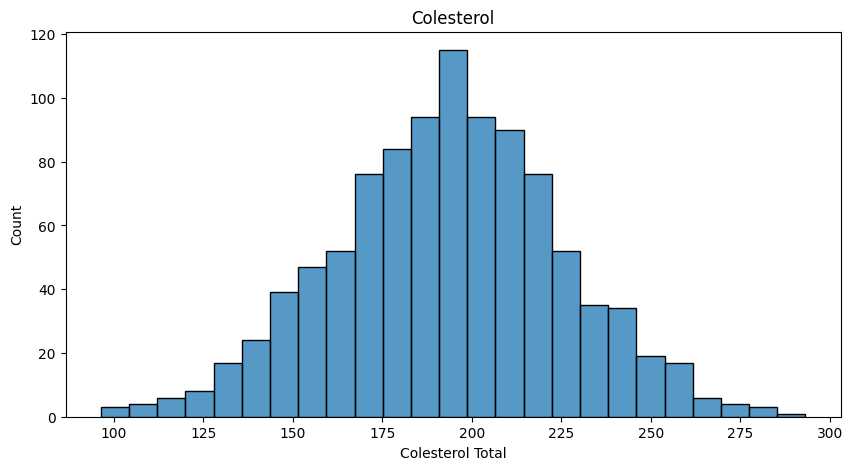

In [53]:
# Criando histograma baseado no colesterol dos dados médicos
plt.figure(figsize=(10,5))
plt.title('Colesterol')
sns.histplot(dados_medicos['Colesterol Total'], bins=25)

<Axes: title={'center': 'Idade'}, xlabel='Idade', ylabel='Count'>

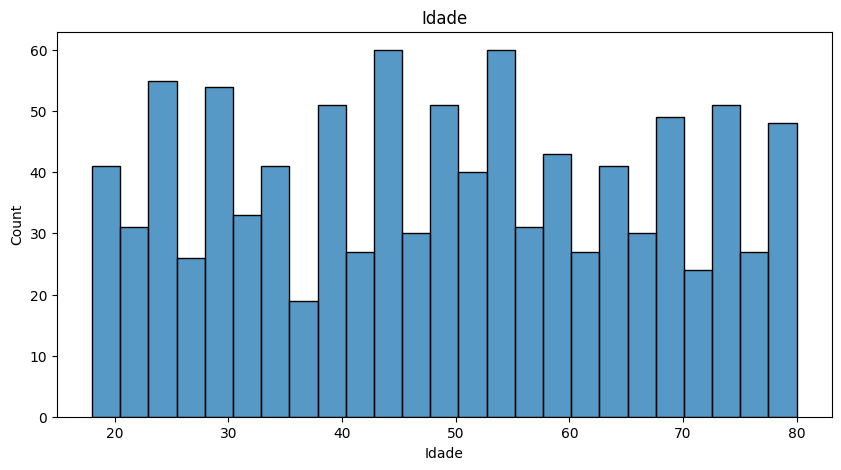

In [54]:
# Criando histograma baseado na Idade dos dados de perfil
plt.figure(figsize=(10,5))
plt.title('Idade')
sns.histplot(dados_perfil['Idade'], bins=25)

# Criando gráfico boxplot

<Axes: title={'center': 'Colesterol dos pacientes'}, xlabel='Colesterol Total'>

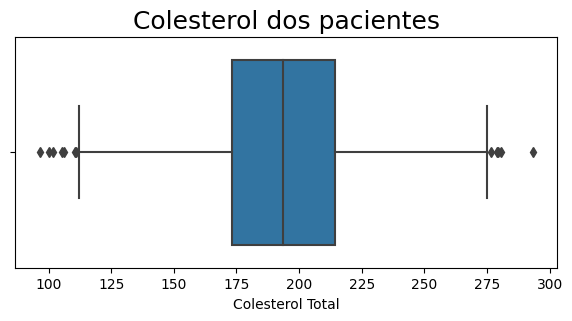

In [57]:
# Criando boxplot para o Colesterol 
plt.figure(figsize=(7,3))
plt.title('Colesterol dos pacientes', size=18)
sns.boxplot(x='Colesterol Total', data=dados_medicos , orient='h')

<Axes: title={'center': 'Idade dos pacientes'}, xlabel='Idade'>

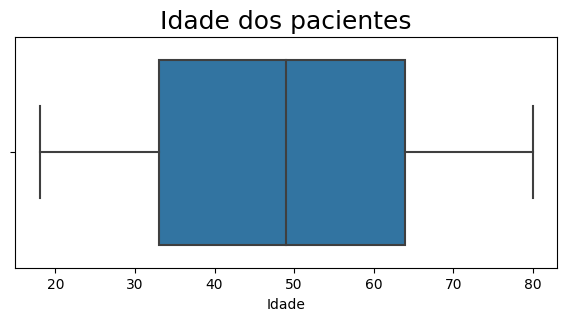

In [62]:
# Criando boxplot para a Idade 
plt.figure(figsize=(7,3))
plt.title('Idade dos pacientes', size=18)
sns.boxplot(x='Idade', data=dados_perfil , orient='h')

In [ ]:
'''# Gerando correlação entre idade e colesterol
plt.figure(figsize=(5,3))
plt.title('Correlação entre idade e colesterol')
dados_correlacao = dados_perfil'''